In [1]:
cd C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/csv/5000hz/300rpm

C:\Users\7-2009-1186-16\Desktop\-sampling-frequency-hz-\csv\5000hz\300rpm


In [ ]:
# import pandas as pd

# # 데이터 파일을 읽어옵니다.
# normal_data = pd.read_csv("300rpm normal data/stream2024_4_22_23_19.csv")
# carriage_data = pd.read_csv("300rpm carriage damage/stream2024_4_23_2_54.csv")
# highspeed_data = pd.read_csv("300rpm high-speed damage/stream2024_4_23_0_20.csv")
# lack_data = pd.read_csv("300rpm lack of lubrication/stream2024_4_23_2_6.csv")
# corrosin = pd.read_csv("300rpm oxidation and corrosion/stream2024_4_23_1_16.csv")

# # 데이터의 처음 몇 개 행을 확인하여 구조를 파악합니다.
# print(carriage_data.head())

# # 데이터 결측값 확인
# missing_values = corrosin.isnull().sum()
# print(missing_values)

In [ ]:
# 데이터 시각화
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 파일을 읽어옵니다.
normal_data = pd.read_csv("300rpm normal data/stream2024_4_22_23_19.csv")
carriage_data = pd.read_csv("300rpm carriage damage/stream2024_4_23_2_54.csv")
highspeed_data = pd.read_csv("300rpm high-speed damage/stream2024_4_23_0_20.csv")
lack_data = pd.read_csv("300rpm lack of lubrication/stream2024_4_23_2_6.csv")
corrosin = pd.read_csv("300rpm oxidation and corrosion/stream2024_4_23_1_16.csv")

combined_data = pd.concat([normal_data, carriage_data, highspeed_data, lack_data, corrosin], ignore_index=True)

print(combined_data)

plt.figure(figsize=(15, 5))
plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(normal_data['motor1_y'], label='Y Axis')
#plt.plot(normal_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
plt.plot(combined_data['motor1_y'], label='Y Axis')
#plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(combined_data['motor1_y'], label='Y Axis')
plt.plot(combined_data['sound'], label='sound')
plt.title('Sound Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Epoch 1/100
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6493 - accuracy: 0.6031 - val_loss: 0.6424 - val_accuracy: 0.6119
Epoch 2/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6436 - accuracy: 0.6082 - val_loss: 0.6418 - val_accuracy: 0.6124
Epoch 3/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6416 - accuracy: 0.6109 - val_loss: 0.6392 - val_accuracy: 0.6159
Epoch 4/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6404 - accuracy: 0.6124 - val_loss: 0.6385 - val_accuracy: 0.6161
Epoch 5/100
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6395 - accuracy: 0.6136 - val_loss: 0.6380 - val_accuracy: 0.6163
Epoch 6/100
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6389 - accuracy: 0.6139 - val_loss: 0.6372 - val_accuracy: 0.6167
Epoch 7/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6384 - accuracy: 0.6145 - val_loss: 0.6365 - val_ac

                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,221
Trainable params: 13,221
Non-trainable params: 0
_________________________________________________________________


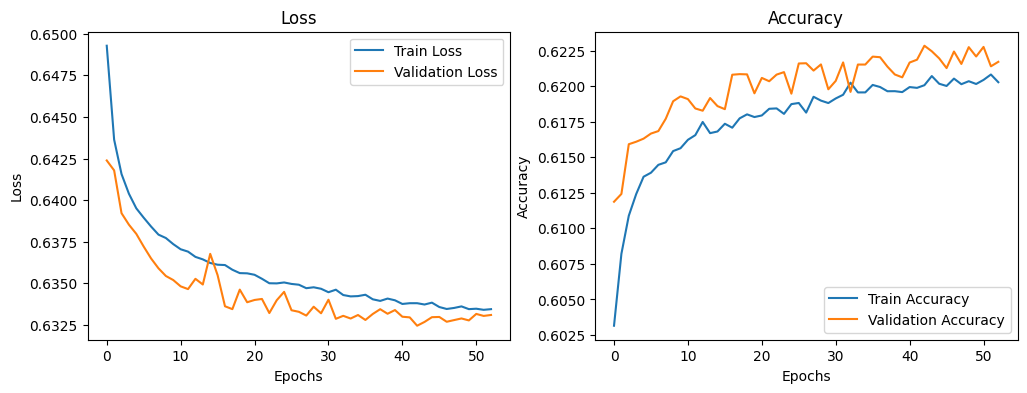

3750/3750 [==============================] - 4s 991us/step - loss: 0.6325 - accuracy: 0.6229
Test Loss: 0.6324517130851746
Test Accuracy: 0.6228583455085754


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 파일 로드
normal_data = pd.read_csv("300rpm normal data/stream2024_4_22_23_19.csv")
carriage_data = pd.read_csv("300rpm carriage damage/stream2024_4_23_2_54.csv")

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
carriage_data['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, carriage_data], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# CNN 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=4, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류 출력 레이어

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.
Epoch 1/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4859 - accuracy: 0.3427 - val_loss: 1.4721 - val_accuracy: 0.3504
Epoch 2/100
4688/4688 [==============================] - 12s 3ms/step - loss: 1.4746 - accuracy: 0.3493 - val_loss: 1.4686 - val_accuracy: 0.3525
Epoch 3/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4718 - accuracy: 0.3510 - val_loss: 1.4675 - val_accuracy: 0.3527
Epoch 4/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4702 - accuracy: 0.3519 - val_loss: 1.4663 - val_accuracy: 0.3533
Epoch 5/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4692 - accuracy: 0.3522 - val_loss: 1.4654 - val_accuracy: 0.3535
Epoch 6/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4683 - accuracy: 0.3528 - val_loss: 1.4644 - val_accuracy: 0.3541
Epoch 7/100
4688/4688 [==============================] - 13s 3ms/step - loss: 1.4675 - a

 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 33,861
Trainable params: 33,861
Non-trainable params: 0
_________________________________________________________________


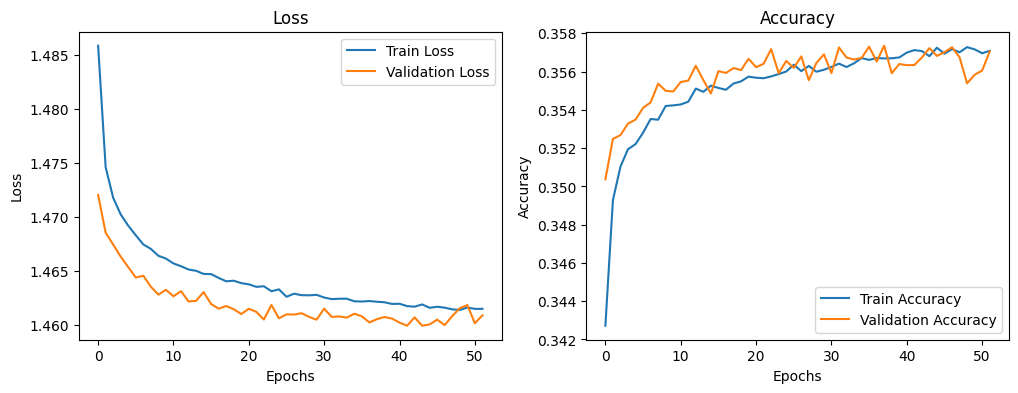

9375/9375 [==============================] - 10s 1ms/step - loss: 1.4599 - accuracy: 0.3563
Test Loss: 1.4599324464797974
Test Accuracy: 0.3563433289527893


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

# GPU 설정
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) == 0:
    print("GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.")
else:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 데이터 파일 로드
# 각 고장 유형에 대한 데이터가 다른 폴더에 위치하는 경우를 가정
# 각 폴더에서 데이터를 로드하고 레이블을 할당한 후 데이터 결합

# 정상 데이터에 레이블 0(정상) 할당
normal_data = pd.read_csv("300rpm normal data/stream2024_4_22_23_19.csv")
normal_data['label'] = 'normal'

# 각 고장 유형에 대한 데이터를 로드하고 해당 레이블 할당
carriage_data = pd.read_csv("300rpm carriage damage/stream2024_4_23_2_54.csv")
carriage_data['label'] = 'carriage_data'

highspeed_data = pd.read_csv("300rpm high-speed damage/stream2024_4_23_0_20.csv")
highspeed_data['label'] = 'highspeed_data'

lack_data = pd.read_csv("300rpm lack of lubrication/stream2024_4_23_2_6.csv")
lack_data['label'] = 'lack_data'

corrosin = pd.read_csv("300rpm oxidation and corrosion/stream2024_4_23_1_16.csv")
corrosin['label'] = 'corrosin'

# 데이터 결합
combined_data = pd.concat([normal_data, carriage_data, highspeed_data, lack_data, corrosin], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z', 'sound']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 레이블 인코딩
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
y = np_utils.to_categorical(y)  # 원-핫 인코딩

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=4, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # 다중 클래스 분류

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])



# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import tensorflow as tf
print("Available GPUs:", len(tf.config.experimental.list_physical_devices('GPU')))
